Background: A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off. Strokes are a medical emergency and urgent treatment is essential. The sooner a person receives treatment for a stroke, the less damage is likely to happen.

source: www.nhs.uk/conditions/stroke/

Motivation : Our objective is to understand what are the reasons that cause stroke and see if we can successfully detect stroke on some features using ML.

## Load dataset

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [418]:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Investigate the dataset

In [419]:
df.drop('id',axis = 1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [420]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Some varialbes are wrongly labeled as numeric.

- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- stroke: 1 if the patient had a stroke or 0 if not

In [421]:
#investigate gender column
print(df["gender"].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [422]:
df.drop(df[df.gender == "Other"].index, inplace=True)

#investigate gender column
print(df["gender"].value_counts())

Female    2994
Male      2115
Name: gender, dtype: int64


In [423]:
#investigate ever_married
print(df["ever_married"].value_counts())

Yes    3353
No     1756
Name: ever_married, dtype: int64


In [424]:
#investigate work type
print(df["work_type"].value_counts())

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [425]:
#investigate residence type
print(df["Residence_type"].value_counts())

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


In [426]:
#investigate smoking status
print(df["smoking_status"].value_counts())

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


## Visualisations

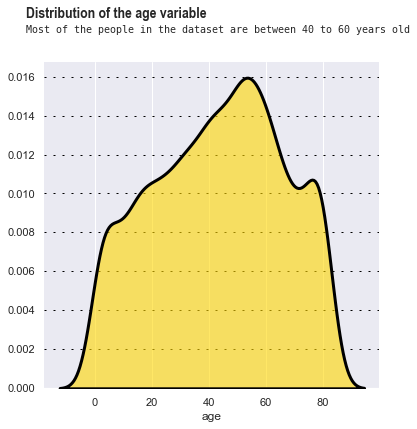

In [427]:
#Distribution of age variable
f, ax = plt.subplots(figsize=(6,6))

#text
ax.text(-24,0.019,'Distribution of the age variable',fontsize=15,fontweight='bold', fontfamily='Arial Narrow')
ax.text(-24,0.01826,'Most of the people in the dataset are between 40 to 60 years old',fontsize=10,fontweight='light', fontfamily='monospace')

#plot and configurations
sns.kdeplot(x= df["age"], shade=True, color="gold", alpha= 0.6, zorder= 3, linewidth= 3, edgecolor= "black")
ax.set_ylabel("")
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
ax.spines[["top", "right", "left"]].set_visible(False)


# most of the people in the df are between 40 to 60 years old

Text(80, 0.045, 'Healthy')

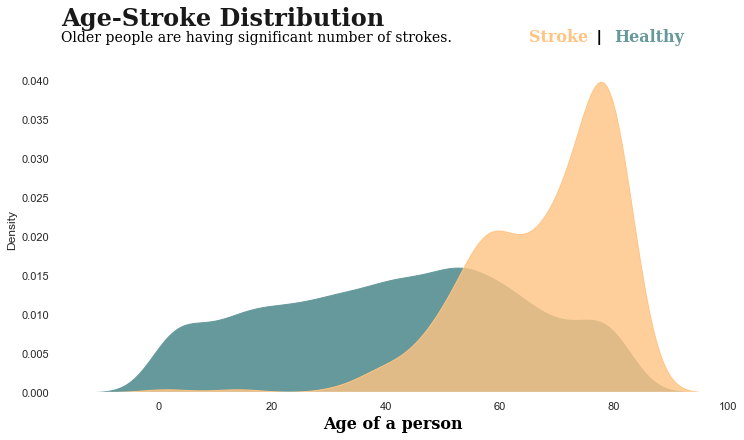

In [428]:
## Age and stroke

#color palette for visualizations
colors = ['#f6f5f5','#66999B','#B3AF8F','#FFC482']
palette = sns.color_palette( palette = colors)

f, ax = plt.subplots(figsize=(12,6))

#background
ax.set_facecolor('white')

sns.kdeplot(data = df[df['stroke'] == 0], ax = ax, x = 'age', shade = True,  alpha = 1, color = '#66999B' )
sns.kdeplot(data = df[df['stroke'] == 1],ax = ax,x = 'age', shade = True,  alpha = 0.8, color = '#FFC482')

ax.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax.text(-17,0.0470,"Age-Stroke Distribution", {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax.text(-17,0.0450,'Older people are having significant number of strokes.', {'font':'Serif', 'color': 'black', 'size':14})
ax.text(65,0.0450, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#FFC482'})
ax.text(77,0.0450, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax.text(80,0.0450, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#66999B'})

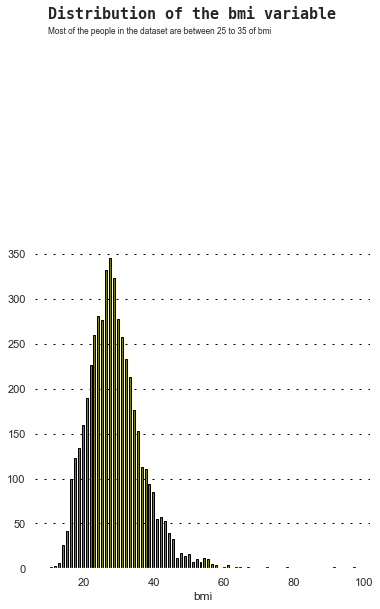

In [429]:
#Distribution of age variable
f, ax = plt.subplots(figsize=(6,6))

#background
ax.set_facecolor('white')

#text
ax.text(10, 612,'Distribution of the bmi variable',fontsize=15,fontweight='bold', fontfamily='monospace')
ax.text(10, 595,'Most of the people in the dataset are between 25 to 35 of bmi',fontsize=10,fontweight='light', fontfamily='Arial Narrow')


#Distribution of age variable
sns.histplot(x= df["bmi"], color='olive', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.5)
ax.set_ylabel("")
ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
ax.spines[["top", "right", "left"]].set_visible(False)


Text(96, 0.1, 'Healthy')

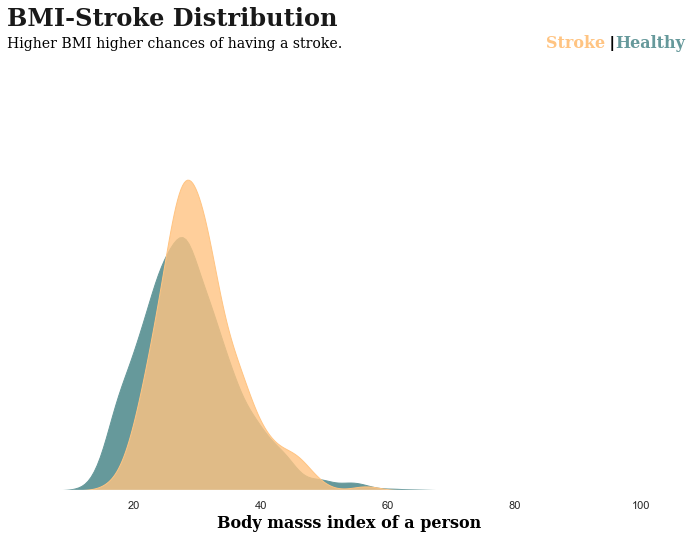

In [430]:
## Age and stroke

#color palette for visualizations
colors = ['#f6f5f5','#66999B','#B3AF8F','#FFC482']
palette = sns.color_palette( palette = colors)

f, ax = plt.subplots(figsize=(12,6))

#axis
ax.set_facecolor('white')
ax.get_yaxis().set_visible(False)

#plot
sns.kdeplot(data = df[df['stroke'] == 0], ax = ax, x = 'bmi', shade = True,  alpha = 1, color = '#66999B' )
sns.kdeplot(data = df[df['stroke'] == 1],ax = ax,x = 'bmi', shade = True,  alpha = 0.8, color = '#FFC482')

ax.set_xlabel('Body masss index of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax.text(0,0.105,"BMI-Stroke Distribution", {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax.text(0,0.100,'Higher BMI higher chances of having a stroke.', {'font':'Serif', 'color': 'black', 'size':14})
ax.text(85,0.100, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#FFC482'})
ax.text(95,0.100, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax.text(96,0.100, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#66999B'})

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Bmi median-transformed'}, xlabel='bmi', ylabel='Density'>

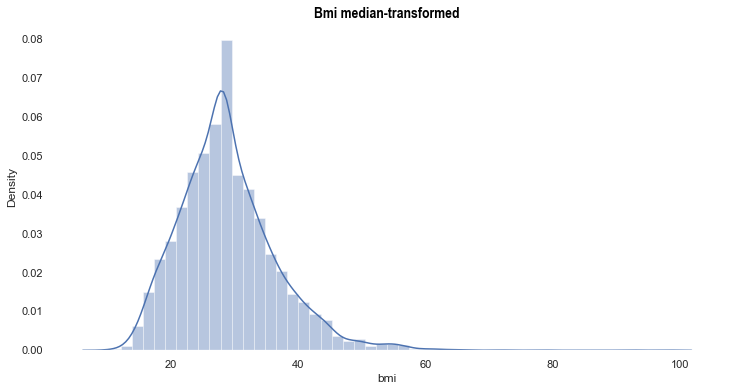

In [431]:
#transform bmi values to log values
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

#background
f, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('white')

plt.title("Bmi median-transformed", {'font':'Arial Narrow', 'weight':'bold','color': 'black', 'size':15})
sns.distplot(df.bmi)

Distribution is right skewed
most of the people in the dataset are between 25 to 35 of bmi

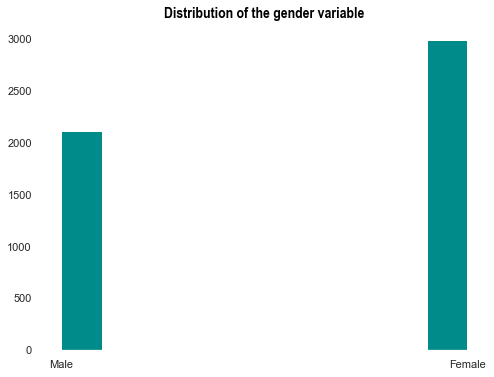

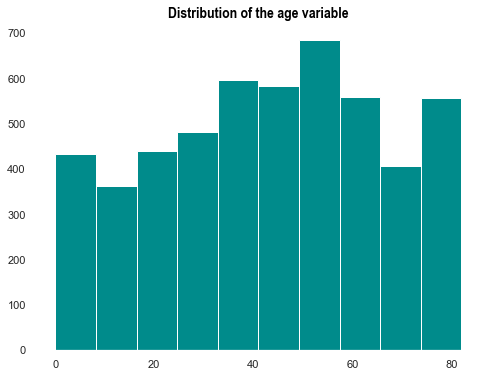

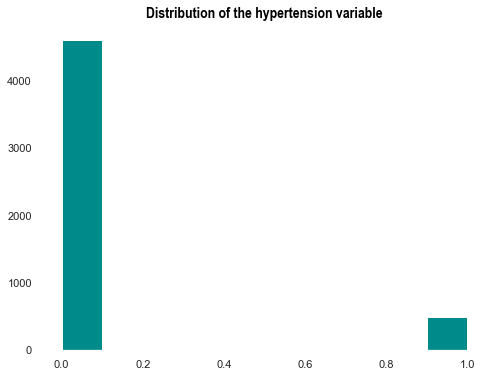

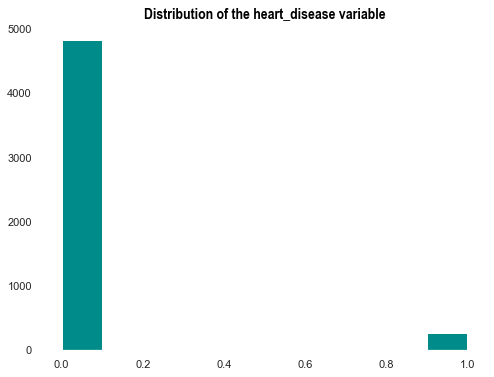

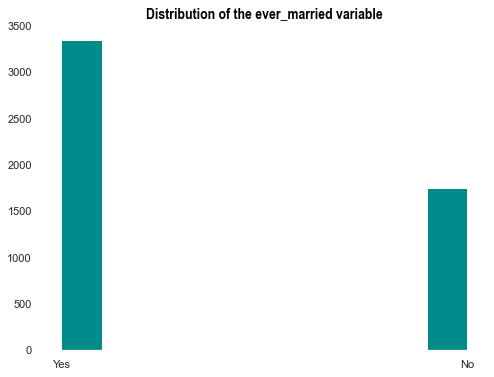

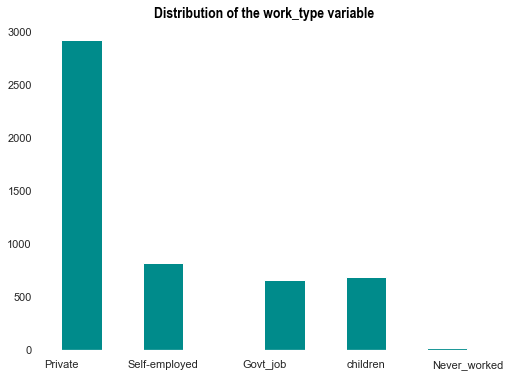

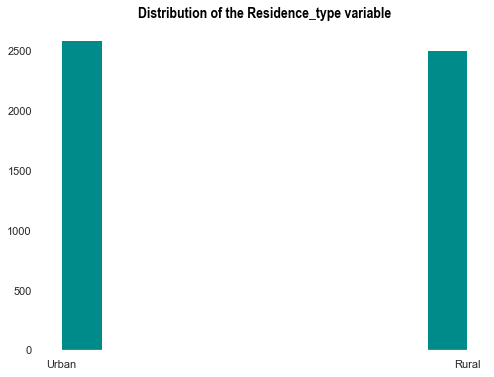

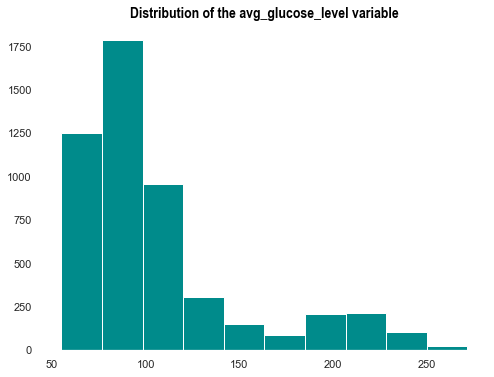

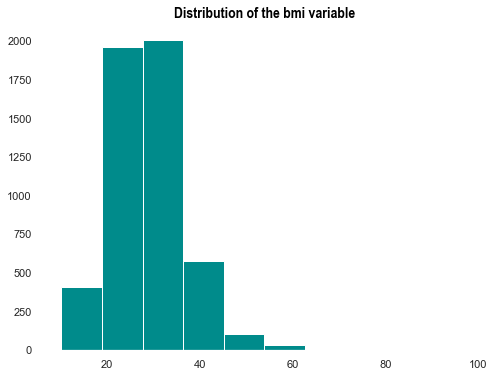

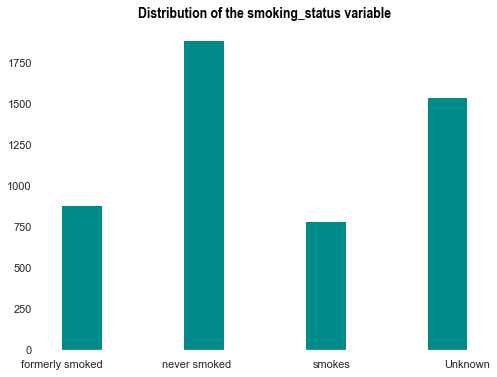

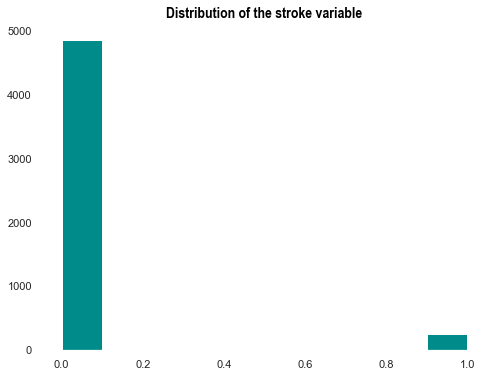

In [432]:
for i in df.columns:
    #background
    f, ax = plt.subplots(figsize=(8,6))
    ax.set_facecolor('white')
#text
    plt.title('Distribution of the {} variable'.format(i) ,{'font':'Arial Narrow', 'weight':'bold','color': 'black', 'size':15})
#Distribution of age variable
    plt.hist(x= df[i], alpha=1, color="darkcyan")
    plt.show()


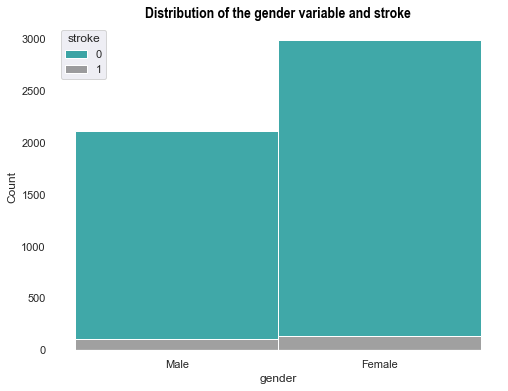

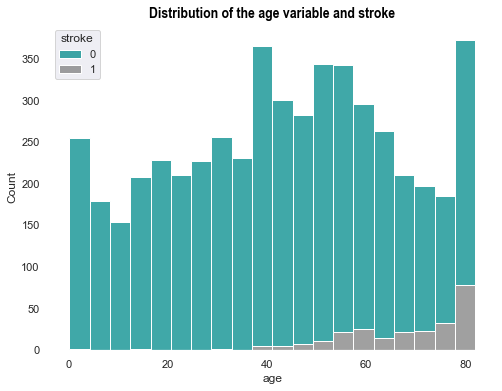

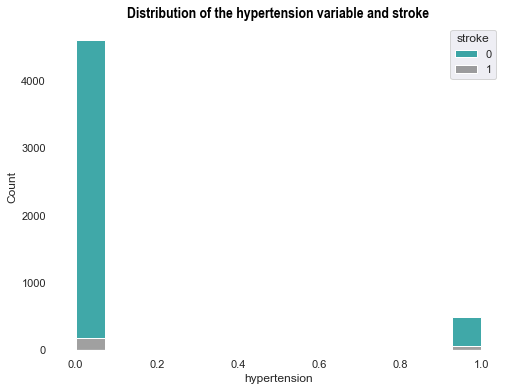

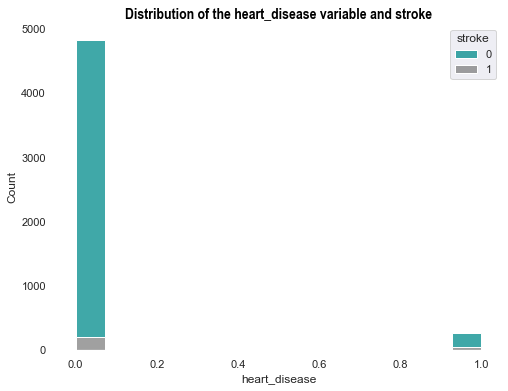

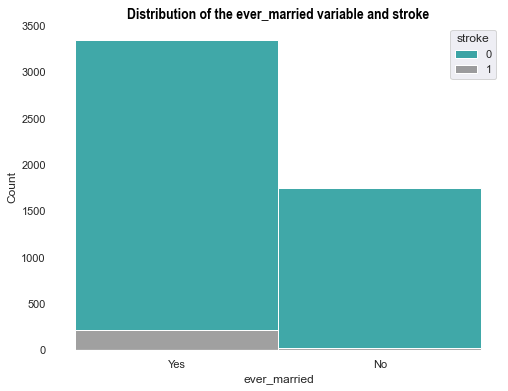

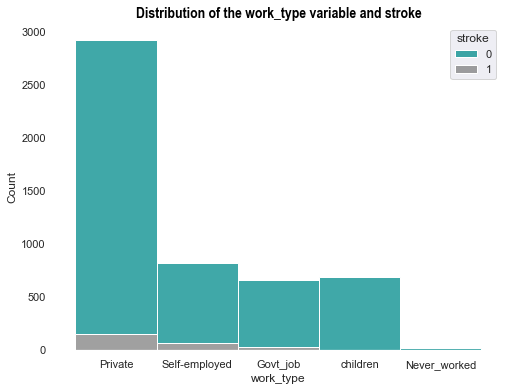

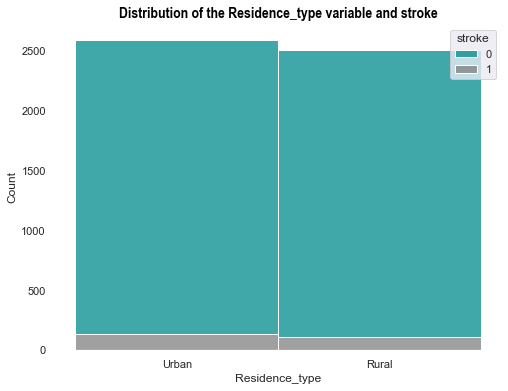

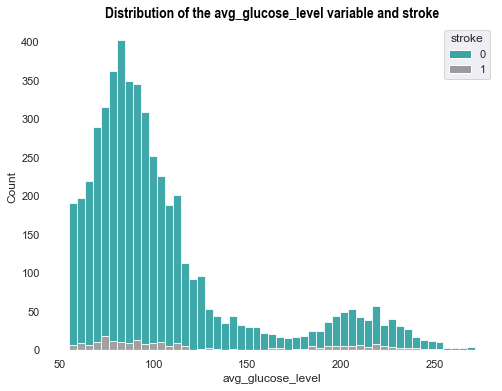

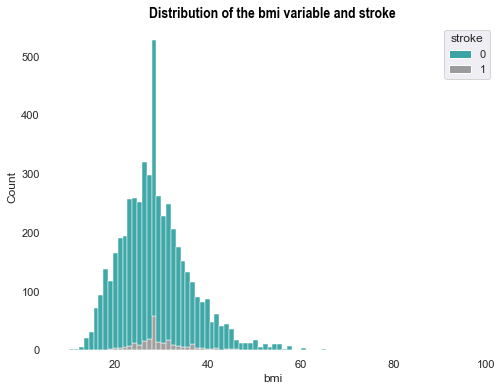

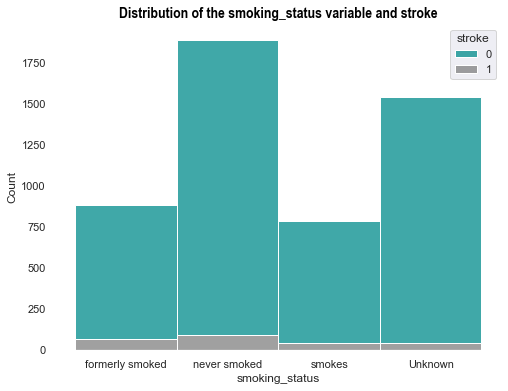

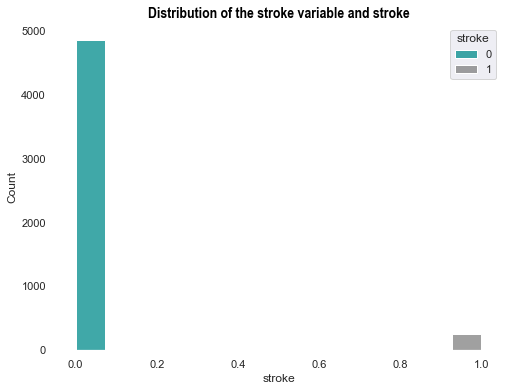

In [433]:
palette2=["darkcyan","grey"]

for i in df.columns:
    f, ax = plt.subplots(figsize=(8,6))
    plt.title("Distribution of the {} variable and stroke".format(i), {'font':'Arial Narrow', 'weight':'bold','color': 'black', 'size':15})
    #background
    ax.set_facecolor('white')
    sns.histplot(data= df, x=i, hue= "stroke", stat= "count", palette=palette2, multiple="stack")
    plt.show()


#### Split data

In [434]:
## Split data
from sklearn.model_selection import train_test_split

X = df.drop(columns=["stroke"])
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

## Data Transformation

In [435]:
#change to category type
#categories = ["gender", "smoking_status", "Residence_type", "work_type"]

#for col in categories:
    #X_train[col] = X_train[col].astype("category")

#### Label Encoder for values yes/no

In [436]:
#change yes/no to numbers
from sklearn.preprocessing import LabelEncoder

#create encoder
enconder = LabelEncoder()
columns =  "hypertension", "heart_disease", "ever_married", "Residence_type", "gender"

#create new variable with assigned numbers
for col in columns:
    X_train[col] = enconder.fit_transform(X_train[col])


#check data again
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4783,1,9.0,0,0,0,children,1,66.11,16.3,Unknown
739,0,55.0,0,0,1,Private,1,55.34,27.1,smokes
623,0,74.0,0,0,1,Private,0,68.34,39.3,Unknown
1165,0,32.0,0,0,1,Private,0,80.28,43.7,never smoked
1792,0,24.0,0,0,0,Private,0,72.06,30.2,formerly smoked


#### One-hot for values with more than 2 category

In [437]:
columns = ['work_type', 'smoking_status']

X_train = pd.get_dummies(X_train, columns= columns, prefix = columns)
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4783,1,9.0,0,0,0,1,66.11,16.3,0,0,0,0,1,1,0,0,0
739,0,55.0,0,0,1,1,55.34,27.1,0,0,1,0,0,0,0,0,1
623,0,74.0,0,0,1,0,68.34,39.3,0,0,1,0,0,1,0,0,0
1165,0,32.0,0,0,1,0,80.28,43.7,0,0,1,0,0,0,0,1,0
1792,0,24.0,0,0,0,0,72.06,30.2,0,0,1,0,0,0,1,0,0


#### Standard Scaler

In [443]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


col_names = ["age", "avg_glucose_level", "bmi"]
features = X_train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_train[col_names] = features
X_train.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4783,1,-1.507833,0,0,0,1,-0.885372,-1.648607,0,0,0,0,1,1,0,0,0
739,0,0.526978,0,0,1,1,-1.123817,-0.226304,0,0,1,0,0,0,0,0,1
623,0,1.367443,0,0,1,0,-0.836000,1.380371,0,0,1,0,0,1,0,0,0
1165,0,-0.490427,0,0,1,0,-0.571652,1.959827,0,0,1,0,0,0,0,1,0
1792,0,-0.844308,0,0,0,0,-0.753640,0.181949,0,0,1,0,0,0,1,0,0


## Feature Selection

### Correlation 

<AxesSubplot:>

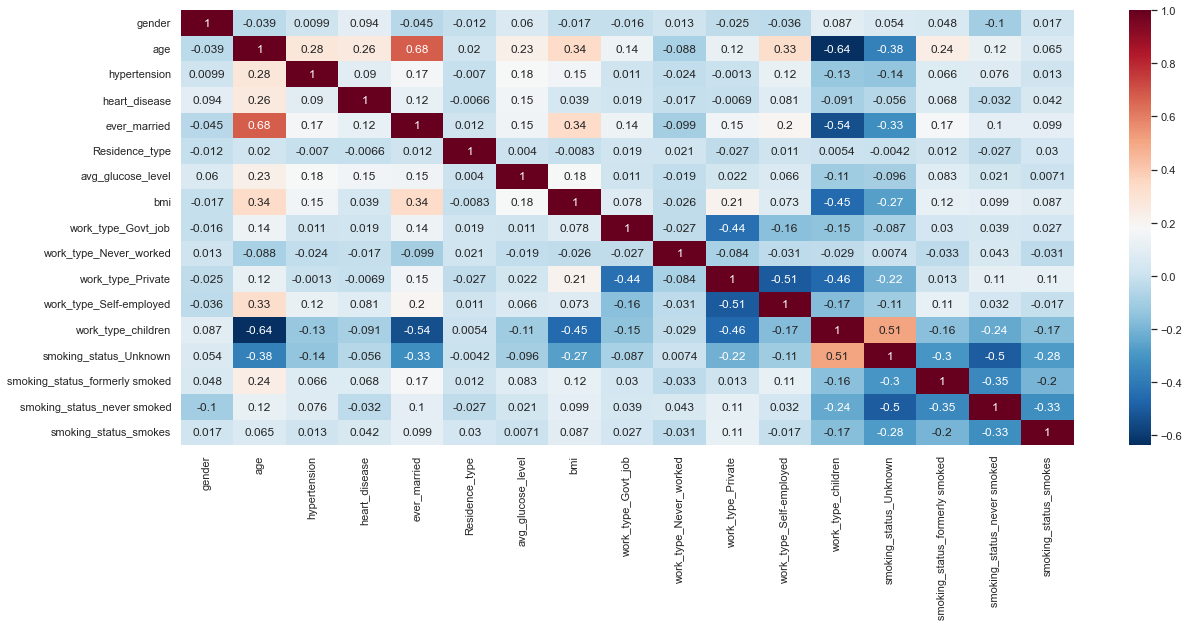

In [444]:
plt.rcParams["figure.figsize"] = (20,8)

#pearson is default
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix,annot = True, cmap = "RdBu_r")

In [445]:
#loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):

        #print variables with high correlation
        if abs(corr_matrix.iloc[i,j]) >0.5:
            print(corr_matrix.columns[i],

corr_matrix.columns[j], corr_matrix.iloc[i,j])


ever_married age 0.6773160028882456
work_type_Self-employed work_type_Private -0.5050203140083895
work_type_children age -0.6383351029284392
work_type_children ever_married -0.5415285181337681
smoking_status_Unknown work_type_children 0.5116106832287693
smoking_status_never smoked smoking_status_Unknown -0.5012342235479682


In [446]:
#use f-statistics for highyl correlated predictors
from sklearn.feature_selection import f_regression

print(f_regression(X_train, y_train))

(array([1.81496850e-01, 2.71792648e+02, 6.21087910e+01, 7.96035064e+01,
       4.27991137e+01, 1.15168549e+00, 7.28537650e+01, 8.52328763e+00,
       5.06421837e-01, 1.05469772e+00, 3.81995444e-01, 1.30387202e+01,
       2.72026395e+01, 1.13567014e+01, 1.95867297e+01, 5.81856958e-08,
       1.30321462e-01]), array([6.70113961e-01, 4.78203312e-59, 4.20302409e-15, 6.95296015e-19,
       6.86825818e-11, 2.83264224e-01, 1.98444019e-17, 3.52675643e-03,
       4.76735283e-01, 3.04492507e-01, 5.36573997e-01, 3.09027009e-04,
       1.92905481e-07, 7.59201967e-04, 9.88118765e-06, 9.99807549e-01,
       7.18118884e-01]))


#### Sequential Forward Selection

('gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private')
0.950404594100757


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:262: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



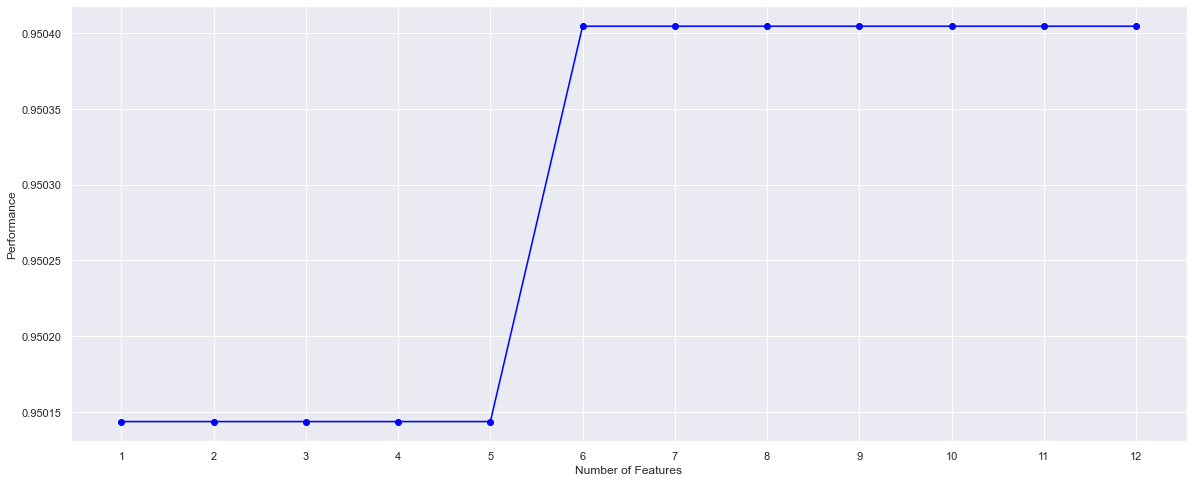

In [447]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = LogisticRegression(max_iter=1000)

sfs = SFS(lr, k_features= 12,
forward= True,
floating= True,
scoring="accuracy", cv=0)

sfs.fit(X_train, y_train)

print(sfs.subsets_[10]["feature_names"])
print(sfs.subsets_[10]["avg_score"])

plot_sfs(sfs.get_metric_dict())
plt.show()

#### Sequential Backward Floating Selection

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:262: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



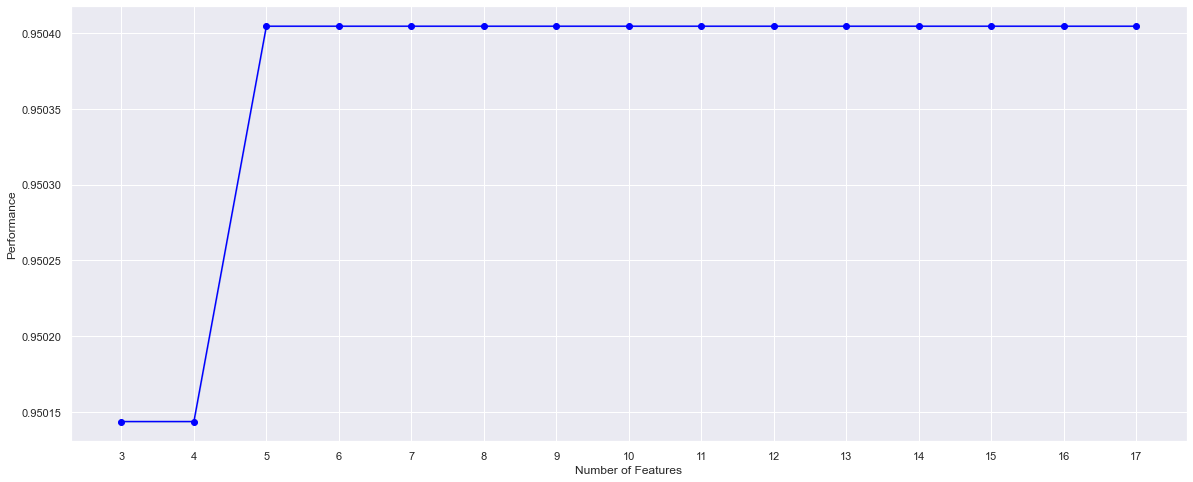

In [448]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = LogisticRegression(max_iter=1000)

sbfs = SFS(lr, k_features= 3,
forward=False,
floating=True,
scoring="accuracy", cv=0)

sbfs.fit(X_train, y_train)
plot_sfs(sbfs.get_metric_dict())
plt.show()

In [449]:
print(sbfs.subsets_[6]["feature_names"])
print(sbfs.subsets_[6]["avg_score"])


('gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type_Self-employed')
0.950404594100757


#####  Recursive Feature Elimination

In [450]:
from sklearn.feature_selection import RFE

lr = LogisticRegression(max_iter=1000)

rfe = RFE(lr, n_features_to_select = 5)
rfe.fit(X_train, y_train)

print(rfe.ranking_)

# Create a list of feature names
feature_list = list(X_train.columns)

# Get a list of features chosen by rfe
rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]

print(rfe_features)

# Print the accuracy of the model with features chosen by recursive feature elimination
print("accuracy of model with features chosen", rfe.score(X_train, y_train))

[12  1  1  1  2  5  3  8  6 11  7  1  1 13 10  4  9]
['age', 'hypertension', 'heart_disease', 'work_type_Self-employed', 'work_type_children']
accuracy of model with features chosen 0.9501435656486557


##### Gini Impurity

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

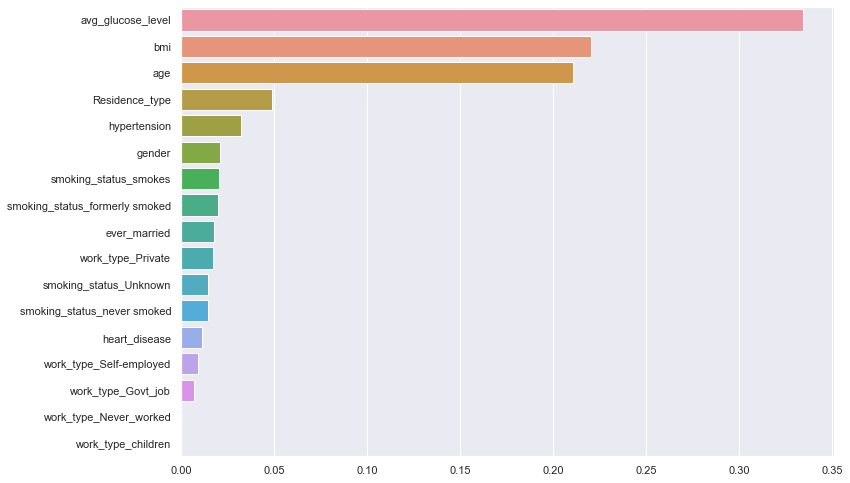

In [451]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion= "gini")

#fit decision tree clasifier
clf = clf.fit(X_train, y_train)

#print feature importances
feature_importances = clf.feature_importances_
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_importances, sorted_feature_names)

### Supervised Learning

##### Drop unnecesary columns

In [452]:
columns_drop = ["work_type_children", "work_type_Never_worked", "smoking_status_Unknown"]
X_train = X_train.drop(columns = columns_drop)

##### test data 

In [453]:
##normalise and encode test data
#change to category type
categories = ["gender", "smoking_status", "Residence_type", "work_type"]

for col in categories:
    X_test[col] = X_test[col].astype("category")

####labelencoder

#change yes/no to numbers
from sklearn.preprocessing import LabelEncoder

#create encoder
enconder = LabelEncoder()
columns =  "hypertension", "heart_disease", "ever_married", "Residence_type", "gender"

#create new variable with assigned numbers
for col in columns:
    X_test[col] = enconder.fit_transform(X_test[col])


##### one hot
columns = ['work_type', 'smoking_status']
X_test = pd.get_dummies(X_test, columns= columns, prefix = columns)
X_test.head()

####standardscaler
col_names = ["age", "avg_glucose_level", "bmi"]
features = X_test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_test[col_names] = features


#check data again
X_test = X_test.drop(columns = columns_drop)

X_test.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
118,0,-0.250173,0,0,0,1,-0.525701,-0.624264,0,0,1,1,0,0
3957,0,-0.250173,0,0,1,1,-0.172983,-0.224566,0,0,1,0,1,0
266,0,-0.073342,0,0,1,0,-0.517152,-0.811622,0,1,0,0,1,0
3348,0,-1.090122,0,0,0,1,-0.592123,-0.674226,0,1,0,0,0,0
3737,0,1.297100,0,0,1,0,-0.165968,-0.174604,0,0,1,0,0,0


In [454]:
model_comparison = {}

#### SVC

In [455]:
from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


#parameters to evaluate
parameters = {'C': [1,2,3,4,5,6], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_model = SVC(random_state=8)

clf = GridSearchCV(svc_model, parameters)
clf.fit(X_train, y_train)
print("Searching for best hyperparameters ...")
print(f'Best Hyperparameters: {clf.best_params_}')

#predict
y_pred = clf.predict(X_test)

#print accuracy
print('\n')
print('Accuracy of SVC classifier on training set: {:.3f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.3f}'
     .format(clf.score(X_test, y_test)))
print('\n')

#print search
model_comparison['SVC'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')]

#print report
print(classification_report(y_test,y_pred, zero_division=1, digits=3))


Searching for best hyperparameters ...
Best Hyperparameters: {'C': 1, 'kernel': 'linear'}


Accuracy of SVC classifier on training set: 0.950
Accuracy of SVC classifier on test set: 0.955


              precision    recall  f1-score   support

           0      0.955     1.000     0.977      1220
           1      1.000     0.000     0.000        58

    accuracy                          0.955      1278
   macro avg      0.977     0.500     0.488      1278
weighted avg      0.957     0.955     0.932      1278



#### Random Forest Classifier

In [476]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [100, 150,200],
    'criterion' :['gini', 'entropy'],
    "random_state":[0]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

rfc_predicted = CV_rfc.predict(X_test)
confusion = confusion_matrix(y_test, rfc_predicted)

print('Accuracy of RFC classifier on training set: {:.3f}'
     .format(CV_rfc.score(X_train, y_train)))
print('Accuracy of RFC classifier on test set: {:.3f}'
     .format(CV_rfc.score(X_test, y_test)))

print('\n')
print(classification_report(y_test,rfc_predicted, zero_division=1, digits=3))



{'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}
Accuracy of RFC classifier on training set: 1.000
Accuracy of RFC classifier on test set: 0.955


              precision    recall  f1-score   support

           0      0.955     1.000     0.977      1220
           1      1.000     0.017     0.034        58

    accuracy                          0.955      1278
   macro avg      0.978     0.509     0.506      1278
weighted avg      0.957     0.955     0.934      1278



In [477]:
#best parameters
rfc1=RandomForestClassifier(random_state=42, n_estimators= 150,  criterion='entropy')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

#append results RFC
model_comparison['RFC'] = [accuracy_score(y_test, rfc_predicted), f1_score(y_test, rfc_predicted, average='weighted')]

Accuracy for Random Forest on CV data:  0.9553990610328639


#### Logistic Regression

In [457]:
from sklearn.linear_model import LogisticRegression

#fit logistic regression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

#confusion matrix
confusion = confusion_matrix(y_test, lr_predicted)
print("Confusion matrix ")
print(confusion)

#print accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.3f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.3f}'
     .format(lr.score(X_test, y_test)))

##add to table
model_comparison['LR'] = [accuracy_score(y_test, lr_predicted), f1_score(y_test, lr_predicted, average='weighted')]
print('\n')

##print confusion
print(classification_report(y_test,lr_predicted, zero_division=1, digits=3))

Confusion matrix 
[[1219    1]
 [  57    1]]
Accuracy of Logistic Regression classifier on training set: 0.950
Accuracy of Logistic Regression classifier on test set: 0.955


              precision    recall  f1-score   support

           0      0.955     0.999     0.977      1220
           1      0.500     0.017     0.033        58

    accuracy                          0.955      1278
   macro avg      0.728     0.508     0.505      1278
weighted avg      0.935     0.955     0.934      1278



##### K-Nearest Neighbors

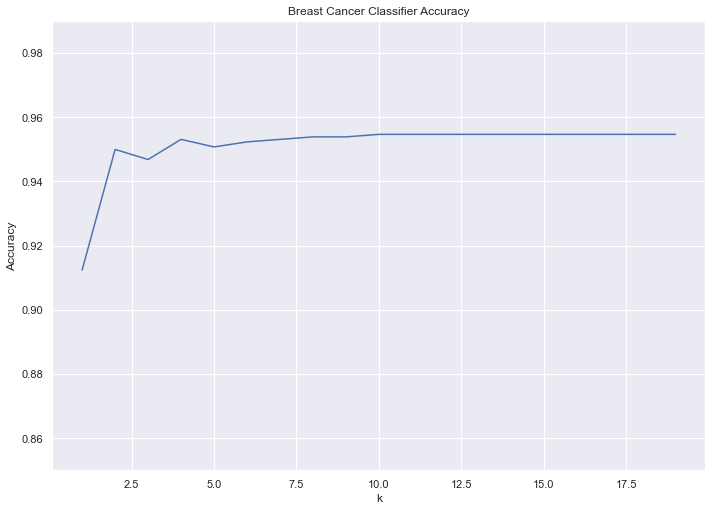

In [458]:
from sklearn.neighbors import KNeighborsClassifier

results = []

#loop for k
for k in range(1,20):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  results.append(classifier.score(X_test, y_test))

k_list = range(1,20)
plt.plot(k_list, results)
plt.ylim(0.85,0.99)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [459]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

#print accuracy
print('Accuracy of K-NN classifier on training set: {:.3f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.3f}'
     .format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test)

model_comparison['KNN'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))


Accuracy of K-NN classifier on training set: 0.950
Accuracy of K-NN classifier on test set: 0.955


              precision    recall  f1-score   support

           0      0.955     1.000     0.977      1220
           1      1.000     0.000     0.000        58

    accuracy                          0.955      1278
   macro avg      0.977     0.500     0.488      1278
weighted avg      0.957     0.955     0.932      1278



### Decision Tree Classifier

In [460]:
parameters = {'max_depth': [1,2,3,4,5,6]}

dt = DecisionTreeClassifier()

dtc = GridSearchCV(dt, parameters)
print("Searching for best hyperparameters ...")
dtc.fit(X_train, y_train)
print(f'Best Hyperparameters: {dtc.best_params_}')
print('\n')

#print accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.3f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.3f}'
     .format(dtc.score(X_test, y_test)))


y_pred = dtc.predict(X_test)
model_comparison['DecisionTreeClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 1}


Accuracy of Logistic Regression classifier on training set: 0.950
Accuracy of Logistic Regression classifier on test set: 0.955


              precision    recall  f1-score   support

           0      0.955     1.000     0.977      1220
           1      1.000     0.000     0.000        58

    accuracy                          0.955      1278
   macro avg      0.977     0.500     0.488      1278
weighted avg      0.957     0.955     0.932      1278



### XGBoost

In [465]:
import xgboost as xgb

parameters = {'n_estimators': [80, 100, 120], 'max_depth':[16, 18, 20]}

xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', learning_rate= 0.1, random_state=0)

clf = GridSearchCV(xgboost, parameters)
print("Searching for best hyperparameters ...")
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(X_test)
model_comparison['XGBoost'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 80}


              precision    recall  f1-score   support

           0      0.955     0.987     0.971      1220
           1      0.059     0.017     0.027        58

    accuracy                          0.943      1278
   macro avg      0.507     0.502     0.499      1278
weighted avg      0.914     0.943     0.928      1278



## Model Comparison

In [478]:
##print table with all results

model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ['Accuracy', 'F1 Score']
model_comparison_df = model_comparison_df.sort_values('F1 Score', ascending=True)
model_comparison_df.style.background_gradient(cmap='RdBu_r')

,Accuracy,F1 Score
XGBoost,0.942879,0.927739
SVC,0.954617,0.932452
KNN,0.954617,0.932452
DecisionTreeClassifier,0.954617,0.932452
LR,0.954617,0.933947
RFC,0.955399,0.934364
